In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
ens = '3296'
nstate_list = [2]

corrtype = '2pt'
xlim = [5.7,15.3]
xticks = [6,7,8,9,10,11,12,13,14,15]
xpref = 10

#corrtype = 'd2pt'
#xlim = [5.7,15.3]
#xticks = [6,7,8,9,10,11,12,13,14,15]
#xpref = 8

#corrtype = 'gV8'
#xlim = [2.7,7.3]
#xticks = [3,4,5,6,7]
#xpref = 5

#corrtype = 'dgV8'
#xlim = [1.7,7.3]
#xticks = [2,3,4,5,6,7]
#xpref = 4

#corrtype = 'gV10'
#xlim = [3.7,9.3]
#xticks = [4,5,6,7,8,9]
#xpref = 6

#corrtype = 'dgV10'
#xlim = [2.7,9.3]
#xticks = [3,4,5,6,7,8,9]
#xpref = 6

npref = 2
filename = './data/%s_tmax_stability_%s.csv' %(ens,corrtype)
data = open(filename,'r')
df = pd.read_csv(filename,index_col=0,header=None).T
df

,2state_t,2state_Q,2state_dZ0_q0_mean,2state_dZ0_q0_sdev,2state_dgV_q0_mean,2state_dgV_q0_sdev,2state_dZ0_q1_mean,2state_dZ0_q1_sdev,2state_dgV_q1_mean,2state_dgV_q1_sdev
1,6.0,8.900309e-01,-1.479388,0.007518,-4.403419,0.092396,-1.489805,0.008273,-4.048761,0.077646
2,7.0,8.344363e-01,-1.486011,0.005814,-4.466740,0.085792,-1.496986,0.006101,-4.059097,0.096533
3,8.0,9.083378e-01,-1.472124,0.015336,-4.366289,0.057185,-1.483124,0.015762,-3.912103,0.061195
4,9.0,8.056735e-01,-1.459878,0.024777,-4.336497,0.097557,-1.473540,0.025809,-3.845151,0.080919
5,10.0,8.328418e-01,-1.471758,0.012969,-4.342650,0.056527,-1.485047,0.013353,-3.850817,0.055370
6,11.0,6.521381e-01,-1.462011,0.017580,-4.377030,0.107690,-1.473879,0.019167,-3.895262,0.088148
7,12.0,7.309278e-01,-1.462625,0.011121,-4.331193,0.112503,-1.474441,0.011345,-3.868669,0.092349
8,13.0,5.539807e-230,-1.375409,0.000522,-4.497958,0.010491,-1.397197,0.000561,-4.167626,0.009070
9,14.0,4.877701e-01,-1.477792,0.004204,-4.246884,0.101049,-1.487230,0.004791,-3.846728,0.089205
10,15.0,1.476754e-267,-1.385175,0.000894,-4.174526,0.012406,-1.388084,0.000632,-3.956267,0.010494


In [59]:
# plot params
figsize = (3.50394*2,2*2.1655535534)
ms = '6'
cs = 6
fs_l = 14
fs_xy = 14
ts = 14
lw = 1
plt_axes = [0.14,0.155,0.825,0.825]
# state and q label
pparam = dict()
# state
pparam['color'] = dict()
pparam['color']['2state'] = 'k' # blue
pparam['color']['q0'] = 'k' # dark blue
pparam['color']['q1'] = 'grey' # dark blue
# q
pparam['shape'] = dict()
pparam['shape']['q0'] = 'o'
pparam['shape']['q1'] = 's'
# label translator
pparam['label'] = dict()
pparam['label']['2pt'] = 'C_{\mathrm{2pt}}(t)\ t_{\mathrm{max}}'
pparam['label']['d2pt'] = 'C^\prime_{\mathrm{2pt}}(t)\ t_{\mathrm{max}}'
pparam['label']['gV8'] = 'C_{\mathrm{3pt}}(8,t^\prime)\ t^\prime_{\mathrm{max}}'
pparam['label']['dgV8'] = 'C^\prime_{\mathrm{3pt}}(8,t^\prime)\ t^\prime_{\mathrm{max}}'
pparam['label']['gV10'] = 'C_{\mathrm{3pt}}(10,t^\prime)\ t^\prime_{\mathrm{max}}'
pparam['label']['dgV10'] = 'C^\prime_{\mathrm{3pt}}(10,t^\prime)\ t^\prime_{\mathrm{max}}'

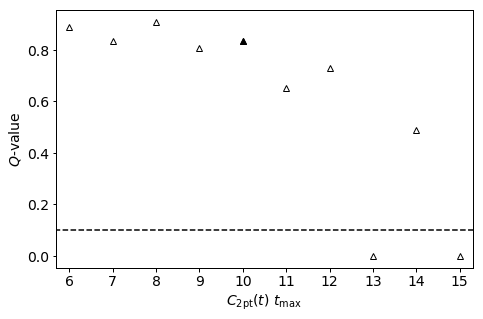

In [60]:
fig = plt.figure('Q-value stability plot',figsize=figsize)
ax = plt.axes(plt_axes)
x = df['2state_t']
for nstate in nstate_list:
    xshifted = x + 0.1*(nstate-2)
    y = df['%sstate_Q' %nstate]
    ax.errorbar(xshifted,y=y,marker='^',color=pparam['color']['%sstate'%nstate],capsize=cs,markersize=ms,\
                elinewidth=lw,mew=lw,fillstyle='none',label='%s-state' %nstate, ls='none')
# preferred
ax.errorbar(xpref+ 0.1*(npref-2),y=df.loc[df['2state_t']==xpref]['%sstate_Q' %npref],marker='^',color=pparam['color']['%sstate'%npref],capsize=cs,markersize=ms,\
            elinewidth=lw,mew=lw,fillstyle='full',label='%s-state' %npref, ls='none')
ax.errorbar(x=[-5,20],y=[0.1,0.1],color='k',ls='--')
#ax.legend(fontsize=fs_l,edgecolor='k',fancybox=False)
ax.set_xlabel(r'$%s$' %pparam['label'][corrtype], fontsize=fs_xy)
ax.set_ylabel(r'$Q$-value', fontsize=fs_xy)
ax.set_xlim(xlim)
ax.set_xticks(xticks)
ax.xaxis.set_tick_params(labelsize=ts,width=lw)
ax.yaxis.set_tick_params(labelsize=ts,width=lw)
[ax.spines[key].set_linewidth(lw) for key in ax.spines]
plt.show()
fig.savefig('./figures/%s_%s_tmax_Q.pdf' %(ens,corrtype), transparent=True)

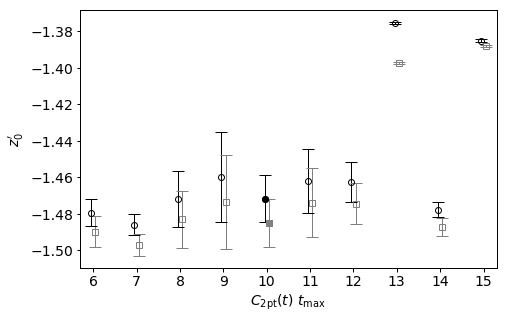

In [61]:
fig = plt.figure('dZ0 stability plot',figsize=figsize)
ax = plt.axes(plt_axes)
x = df['2state_t']
for nstate in nstate_list:
    for q in [0,1]:
        xshifted = x + 0.1*(nstate-2)
        xshifted = xshifted + 0.1*(q-0.5)
        y = df['%sstate_dZ0_q%s_mean' %(nstate,q)]
        yerr = df['%sstate_dZ0_q%s_sdev' %(nstate,q)]
        ax.errorbar(xshifted,y=y,yerr=yerr,marker=pparam['shape']['q%s' %q],color=pparam['color']['q%s' %q],capsize=cs,markersize=ms,\
                    elinewidth=lw,mew=lw,fillstyle='none',label='%s-state' %nstate, ls='none')
# preferred
for q in [0,1]:
    ax.errorbar(xpref+ 0.1*(npref-2)+0.1*(q-0.5),y=df.loc[df['2state_t']==xpref]['%sstate_dZ0_q%s_mean' %(npref,q)],marker=pparam['shape']['q%s' %q],color=pparam['color']['q%s' %q],capsize=cs,markersize=ms,\
                elinewidth=lw,mew=lw,fillstyle='full',label='%s-state' %npref, ls='none')
#ax.legend(fontsize=fs_l,edgecolor='k',fancybox=False)
ax.set_xlabel(r'$%s$' %pparam['label'][corrtype], fontsize=fs_xy)
ax.set_ylabel(r'$z_0^\prime$', fontsize=fs_xy)
ax.set_xlim(xlim)
ax.set_xticks(xticks)
ax.xaxis.set_tick_params(labelsize=ts,width=lw)
ax.yaxis.set_tick_params(labelsize=ts,width=lw)
[ax.spines[key].set_linewidth(lw) for key in ax.spines]
plt.show()
fig.savefig('./figures/%s_%s_tmax_dZ0.pdf' %(ens,corrtype), transparent=True)

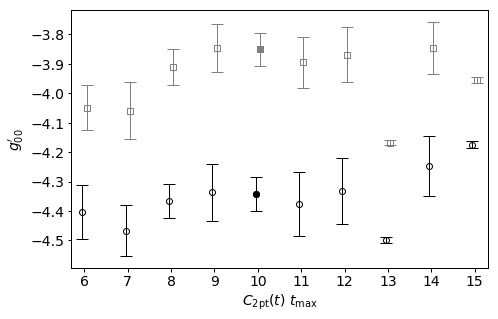

In [62]:
fig = plt.figure('dgV stability plot',figsize=figsize)
ax = plt.axes(plt_axes)
x = df['2state_t']
for nstate in nstate_list:
    for q in [0,1]:
        xshifted = x + 0.1*(nstate-2)
        xshifted = xshifted + 0.1*(q-0.5)
        y = df['%sstate_dgV_q%s_mean' %(nstate,q)]
        yerr = df['%sstate_dgV_q%s_sdev' %(nstate,q)]
        ax.errorbar(xshifted,y=y,yerr=yerr,marker=pparam['shape']['q%s' %q],color=pparam['color']['q%s' %q],capsize=cs,markersize=ms,\
                    elinewidth=lw,mew=lw,fillstyle='none',label='%s-state' %nstate, ls='none')
for q in [0,1]:
    ax.errorbar(xpref+ 0.1*(npref-2)+ 0.1*(q-0.5),y=df.loc[df['2state_t']==xpref]['%sstate_dgV_q%s_mean' %(npref,q)],marker=pparam['shape']['q%s' %q],color=pparam['color']['q%s' %q],capsize=cs,markersize=ms,\
                elinewidth=lw,mew=lw,fillstyle='full',label='%s-state' %npref, ls='none')
#ax.legend(fontsize=fs_l,edgecolor='k',fancybox=False)
ax.set_xlabel(r'$%s$' %pparam['label'][corrtype], fontsize=fs_xy)
ax.set_ylabel(r'$g_{00}^\prime$', fontsize=fs_xy)
ax.set_xlim(xlim)
ax.set_xticks(xticks)
ax.xaxis.set_tick_params(labelsize=ts,width=lw)
ax.yaxis.set_tick_params(labelsize=ts,width=lw)
[ax.spines[key].set_linewidth(lw) for key in ax.spines]
plt.show()
fig.savefig('./figures/%s_%s_tmax_dgV.pdf' %(ens,corrtype), transparent=True)